# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (`df.rename()`, `df.drop()`) 
* Manipulate the index in DataFrames (`df.reindex()`, `df.drop()`, `df.rename()`) 
* Manipulate column datatypes 

## Let's get started!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('turnstile_180901.txt')
print(df.shape)
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [5]:
#Your code here
df.columns = df.columns.map(lambda x: x.lower())
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the Index to be the Line Names

In [10]:
#Your code here
df = df.set_index(df.linename)
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
linename,,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Remove the index

In [13]:
# Your code here
df = df.reset_index(drop=True)
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order
*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [19]:
# Your code here
df['Num_Lines'] = df.linename.map(len)
df = df.sort_values('Num_Lines',ascending=False)
df.head()


,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,Num_Lines
132292,R151,R033,00-00-00,TIMES SQ-42 ST,1237ACENQRSW,IRT,08/30/2018,00:00:00,REGULAR,1417952,3267016,12
2686,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/29/2018,16:00:00,REGULAR,2836145,3311412,12
2673,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/27/2018,16:00:00,REGULAR,2830710,3305818,12
2674,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/27/2018,20:00:00,REGULAR,2832048,3306310,12
2675,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/28/2018,00:00:00,REGULAR,2832325,3306433,12


## Write a function to clean a column name

In [23]:
def clean(col_name):
    cleaned = col_name.lower().strip() #Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [24]:
# This is a list comprehension. It applies your clean function to every item in the list.
# We then reassign that to df.columns
# You shouldn't have to change anything here.
# Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [27]:
# Checking the output, we can see the results.
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')

## Group the Data by Day of Week and Plot the Sum of The Numeric Columns

In [58]:
# Your code here
# pd.to_datetime(df.date).head()
df.date = pd.to_datetime(df.date)
df.date.dt.day_name()
# df.groupby(df.date.dt.day_name() in ('Sunday','Saturday')).sum()
df.loc(df.date.dt.day_name() == 'Sunday')

TypeError: 'Series' objects are mutable, thus they cannot be hashed

## Group the Data by Weekend/Weekday and Plot the Sum of the Numeric Columns

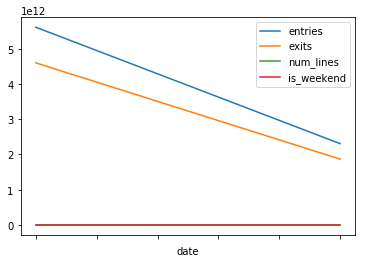

In [72]:
#Your code here
weekdays = {'Monday','Tuesday','Wednesday','Thursday','Friday'}
weekend = {'Sunday','Saturday'}

def is_weekend(day_of_week):
    weekdays = {'Monday','Tuesday','Wednesday','Thursday','Friday'}
    weekend = {'Sunday','Saturday'}
    return day_of_week in weekend

df['is_weekend'] = (df.date.dt.day_name() == 'Sunday') | (df.date.dt.day_name() == 'Saturday')
df.groupby(['is_weekend']).sum()
weekender = df.groupby((df.date.dt.day_name() == 'Sunday') | (df.date.dt.day_name() == 'Saturday')).sum()
weekender.plot()

## Analysis Question: 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# Your answer here 
# line chart, should be a bar chart

## Drop a couple of columns

In [77]:
# Your code here
df.drop(['c/a','scp'],axis=1)
df.info()
df['day_of_week']=df.date.dt.day_name()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197625 entries, 132292 to 197624
Data columns (total 14 columns):
c/a            197625 non-null object
unit           197625 non-null object
scp            197625 non-null object
station        197625 non-null object
linename       197625 non-null object
division       197625 non-null object
date           197625 non-null datetime64[ns]
time           197625 non-null object
desc           197625 non-null object
entries        197625 non-null int64
exits          197625 non-null int64
num_lines      197625 non-null int64
is_weekend     197625 non-null bool
day_of_week    197625 non-null object
dtypes: bool(1), datetime64[ns](1), int64(3), object(9)
memory usage: 26.3+ MB


,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,num_lines,is_weekend,day_of_week
132292,R151,R033,00-00-00,TIMES SQ-42 ST,1237ACENQRSW,IRT,2018-08-30,00:00:00,REGULAR,1417952,3267016,12,False,Thursday
2686,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,2018-08-29,16:00:00,REGULAR,2836145,3311412,12,False,Wednesday
2673,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,2018-08-27,16:00:00,REGULAR,2830710,3305818,12,False,Monday
2674,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,2018-08-27,20:00:00,REGULAR,2832048,3306310,12,False,Monday
2675,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,2018-08-28,00:00:00,REGULAR,2832325,3306433,12,False,Tuesday


## Summary

Great! You practiced your data cleanup skills using Pandas.